**Importing Libraries and Loading Data Sets**

We first load the relevant libraries required and the three data sets provided for this final project.

In [1]:
# import the relevant libraries
import pandas as pd
pd.set_option('display.max_columns',100)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the three data sets
calendar = pd.read_csv("calendar.csv")
calendar

,date,wm_yr_wk,weekday,wday,month,year,d
0,2011-01-29,11101,Saturday,1,1,2011,d_1
1,2011-01-30,11101,Sunday,2,1,2011,d_2
2,2011-01-31,11101,Monday,3,1,2011,d_3
3,2011-02-01,11101,Tuesday,4,2,2011,d_4
4,2011-02-02,11101,Wednesday,5,2,2011,d_5
...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966
1966,2016-06-17,11620,Friday,7,6,2016,d_1967
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968


In [3]:
prices = pd.read_csv("prices.csv")
prices

,store_id,item_id,wm_yr_wk,sell_price
0,East_1,Beauty_1_001,11325,9.58
1,East_1,Beauty_1_001,11326,9.58
2,East_1,Beauty_1_001,11327,8.26
3,East_1,Beauty_1_001,11328,8.26
4,East_1,Beauty_1_001,11329,8.26
...,...,...,...,...
6841116,West_3,Food_3_827,11617,1.00
6841117,West_3,Food_3_827,11618,1.00
6841118,West_3,Food_3_827,11619,1.00
6841119,West_3,Food_3_827,11620,1.00


In [4]:
# find the average prices for each item using the groupby() function in Python
average_prices_by_item = prices.groupby("item_id").mean()
average_prices_by_item

,wm_yr_wk,sell_price
item_id,,
Beauty_1_001,11470.073953,8.298076
Beauty_1_002,11356.682972,3.967459
Beauty_1_003,11502.870914,2.965733
Beauty_1_004,11349.696569,4.502845
Beauty_1_005,11362.124060,2.880902
...,...,...
Food_3_823,11357.134124,2.795198
Food_3_824,11347.780142,2.521142
Food_3_825,11348.042599,4.107856


In [5]:
train = pd.read_csv("train.csv")
train

,id,item_id,subcat_id,category_id,store_id,region_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,...,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919
0,Beauty_1_001_East_1,Beauty_1_001,Beauty_1,Beauty,East_1,East,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,3,1,3,1,2,2,0,1,1,1,1,0,0,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1,0,0,0,2,0,3
1,Beauty_1_002_East_1,Beauty_1_002,Beauty_1,Beauty,East_1,East,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,Beauty_1_003_East_1,Beauty_1_003,Beauty_1,Beauty,East_1,East,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1,0,0,1,1,0,2
3,Beauty_1_004_East_1,Beauty_1_004,Beauty_1,Beauty,East_1,East,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,1,0,...,1,2,3,0,1,3,4,2,1,4,1,3,5,0,6,6,0,0,0,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2,0,0,1,2,4,1
4,Beauty_1_005_East_1,Beauty_1_005,Beauty_1,Beauty,East_1,East,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,1,1,0,3,2,2,2,3,1,0,0,0,0,1,0,4,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4,1,0,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,Food_3_823_West_3,Food_3_823,Food_3,Food,West_3,West,0,0,2,2,0,3,1,4,1,0,0,3,4,4,0,0,1,0,1,1,7,7,3,6,3,3,7,12,4,2,7,5,12,5,3,3,7,6,4,6,3,6,2,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,2,2,0
30486,Food_3_824_West_3,Food_3_824,Food_3,Food,West_3,West,0,0,0,0,0,5,0,1,1,3,1,1,0,4,2,0,1,2,1,1,0,0,0,0,3,1,1,1,2,0,1,0,1,1,1,3,3,4,4,3,6,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0
30487,Food_3_825_West_3,Food_3_825,Food_3,Food,West_3,West,0,6,0,2,2,4,1,8,5,2,7,5,3,5,20,8,10,3,3,4,7,2,3,5,6,3,4,1,2,5,1,2,2,2,1,9,8,1,6,3,3,4,10,4,...,1,1,0,3,1,1,2,0,0,2,0,0,0,2,0,1,1,0,0,0,0,1,1,2,1,4,0,0,2,2,4,0,0,0,2,1,0,2,0,1,0,0,1,0,0,0,1,1,0,2
30488,Food_3_826_West_3,Food_3_826,Food_3,Food,West_3,West,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,3,0,3,1,1,1,1,1,1,0,2,1,1,2,4,3,0,0,0,0,0,1,1,2,1,1,1,1,2,0,1,0,3,0,0,1,0,0,1,0,3,1,3,1,3,0,1,2,1


In [6]:
# check whether all stores have a unique ID 
len(train["id"].unique()) == len(train)

True

We know that we have 30490 stores, each with its unique ID.

In [7]:
# check for nan for all three data sets
calendar.isnull().values.any()
prices.isnull().values.any()
train.isnull().values.any()

False

There are no NA values present in the three data sets.

**EDA**

We first conduct some exploratory data analysis to better understand trends associated with the three data sets we have.

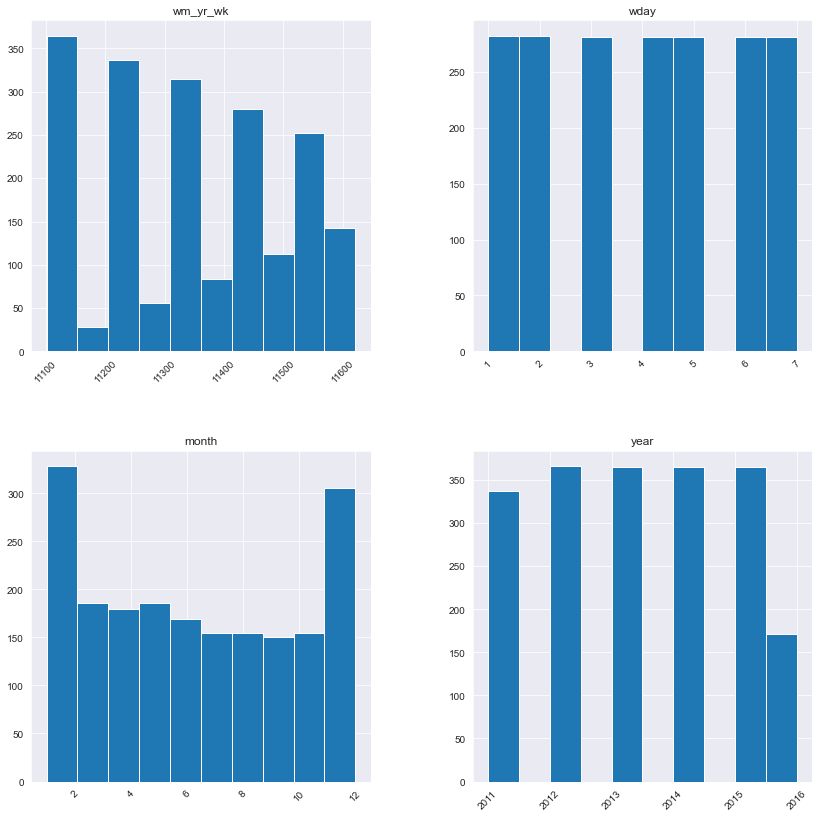

In [8]:
calendar.hist(figsize=(14,14), xrot=45)
plt.show()

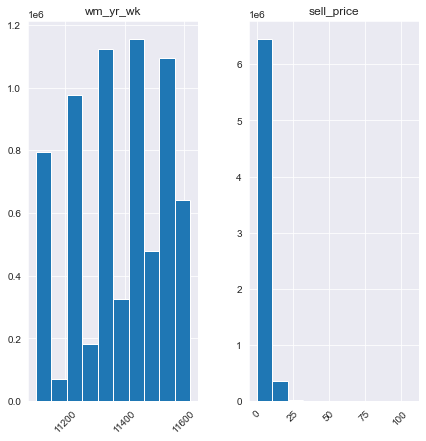

In [9]:
prices.hist(figsize=(7,7), xrot=45)
plt.show()

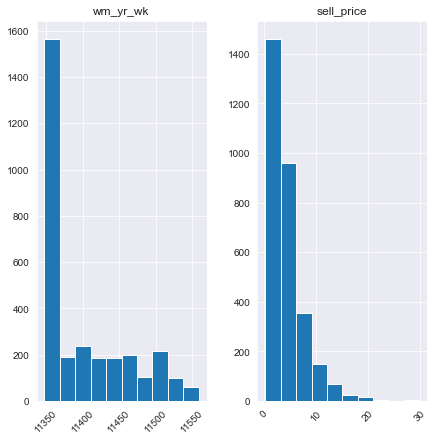

In [10]:
average_prices_by_item.hist(figsize=(7,7), xrot=45)
plt.show()

In [12]:
calendar.describe()

,wm_yr_wk,wday,month,year
count,1969.000000,1969.000000,1969.000000,1969.000000
mean,11347.086338,3.997461,6.325546,2013.288471
std,155.277043,2.001141,3.416864,1.580198
min,11101.000000,1.000000,1.000000,2011.000000
25%,11219.000000,2.000000,3.000000,2012.000000
50%,11337.000000,4.000000,6.000000,2013.000000
75%,11502.000000,6.000000,9.000000,2015.000000
max,11621.000000,7.000000,12.000000,2016.000000


In [13]:
prices.describe()

,wm_yr_wk,sell_price
count,6.841121e+06,6.841121e+06
mean,1.138294e+04,4.410952e+00
std,1.486100e+02,3.408814e+00
min,1.110100e+04,1.000000e-02
25%,1.124700e+04,2.180000e+00
50%,1.141100e+04,3.470000e+00
75%,1.151700e+04,5.840000e+00
max,1.162100e+04,1.073200e+02


In [14]:
train.describe()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,...,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919
count,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,...,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000
mean,1.070220,1.041292,0.780026,0.833454,0.627944,0.958052,0.918662,1.244080,1.073663,0.838701,0.756674,0.775927,0.779141,0.867334,1.142440,1.193178,0.715120,0.789439,0.703280,0.666382,0.777993,1.039324,0.960413,0.786028,0.672384,0.680781,0.665038,0.738898,0.980912,0.941522,0.696622,0.750148,0.723057,0.769925,0.773106,1.023352,1.143850,0.805576,0.746212,0.739915,0.742079,0.838701,1.056904,1.030403,0.817809,0.787832,0.746638,0.714300,0.782388,1.003575,...,1.728796,1.686487,1.378649,1.315743,1.200590,1.148213,1.300492,1.514628,1.568547,1.225320,1.163496,1.140899,1.115218,1.495933,1.766579,1.520499,1.182060,1.110430,1.061299,1.137455,1.493473,1.727517,1.850607,1.325615,1.301509,1.283503,1.250115,1.417514,1.847819,1.766350,1.391505,1.281371,1.154247,1.230863,1.370581,1.586159,1.693670,1.248245,1.232207,1.159167,1.149000,1.328862,1.605838,1.633158,1.272319,1.163890,1.129715,1.139128,1.406888,1.653952
std,5.126689,5.365468,3.667454,4.415141,3.379344,4.785947,5.059495,6.617729,5.917204,4.206199,3.665969,3.697822,3.486595,3.484608,4.636395,4.662770,2.993414,3.296922,2.811648,2.611911,2.985123,3.923110,3.597620,3.084773,2.874189,2.727852,2.637849,2.842334,3.714944,3.688771,2.708641,2.922533,2.888537,3.085799,3.136922,3.944627,4.617819,3.076988,3.011551,3.023168,2.943395,3.219799,4.112437,3.858483,3.204146,3.178801,2.945178,2.910318,2.985018,3.799143,...,4.379331,4.244859,3.599718,3.452243,3.138745,3.085343,3.368736,3.958988,4.116284,2.994501,2.986132,2.909689,2.934280,3.999311,4.875745,4.539663,2.932883,2.969828,2.795303,2.982687,3.696225,4.371541,4.549733,3.353388,3.375255,3.429146,3.292236,3.730618,4.619235,4.290072,3.620804,3.329683,2.933918,3.303282,3.740017,4.097191,4.359809,3.276925,3.125471,2.876026,2.950364,3.358012,4.089422,3.812248,3.237593,2.958058,2.899251,2.884903,3.601825,4.078230
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [15]:
train.subcat_id.value_counts()

Food_3        8230
Cleaning_1    5320
Cleaning_2    5150
Beauty_1      4160
Food_2        3980
Food_1        2160
Beauty_2      1490
Name: subcat_id, dtype: int64

In [16]:
train.category_id.value_counts()

Food        14370
Cleaning    10470
Beauty       5650
Name: category_id, dtype: int64

Amongst all the products sold, food and cleaning are the two dominant categories. Beauty products are comparatively fewer in this data set.

In [17]:
train.store_id.value_counts()

East_2       3049
Central_3    3049
Central_2    3049
East_3       3049
East_1       3049
West_1       3049
Central_1    3049
West_3       3049
East_4       3049
West_2       3049
Name: store_id, dtype: int64

In [18]:
train.region_id.value_counts()

East       12196
West        9147
Central     9147
Name: region_id, dtype: int64

The most number of stores are located in the East region. There happen to an equal number of stores located in the West and Central region.

**Statistical Endogenous Methods**

As you can see, we are given three data sets in this assignment: calendar, prices and train. In particular, we are looking at the train data set with historical data of the 1920 days prior to the forecast starting point. Based on this, we are to provide a 21-day-forecast of the unit sales at the store, product level. We start with using statistical endogenous methods, followed by incorporating features from the other two data sets.

*1. Naive Approach*

We first take a naive approach by using the average across all previous days in our forecast. We will split the data set into two : training (80%) and testing (20%).

In [19]:
# training set for the naive approach
training  = train.iloc[: , 6:1542]
training

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,...,d_1487,d_1488,d_1489,d_1490,d_1491,d_1492,d_1493,d_1494,d_1495,d_1496,d_1497,d_1498,d_1499,d_1500,d_1501,d_1502,d_1503,d_1504,d_1505,d_1506,d_1507,d_1508,d_1509,d_1510,d_1511,d_1512,d_1513,d_1514,d_1515,d_1516,d_1517,d_1518,d_1519,d_1520,d_1521,d_1522,d_1523,d_1524,d_1525,d_1526,d_1527,d_1528,d_1529,d_1530,d_1531,d_1532,d_1533,d_1534,d_1535,d_1536
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,2,2,2,0,0,1,0,0,1,3,0,0,0,1,1,0,1,0,1,0,0,1,1,1,2,1,1,1,0,2,2,2,1,0,0,0,1,2,0,0,1,2,1,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,1,0,0,0,0,0,0,2,...,2,0,0,1,3,4,1,0,2,1,2,1,3,10,1,2,0,0,1,0,3,2,0,4,0,3,1,10,1,0,0,4,5,7,0,0,2,0,1,4,1,7,1,1,0,8,2,0,8,2
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,2,1,2,0,2,1,1,1,2,2,1,0,1,1,2,0,1,4,2,0,2,2,1,3,1,1,2,0,2,0,1,0,0,1,0,1,4,0,0,1,0,2,0,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,0,0,2,2,0,3,1,4,1,0,0,3,4,4,0,0,1,0,1,1,7,7,3,6,3,3,7,12,4,2,7,5,12,5,3,3,7,6,4,6,3,6,2,3,4,1,1,3,2,1,...,0,0,0,0,0,0,2,1,0,0,0,0,0,2,0,0,2,1,0,1,1,2,1,0,0,0,2,4,1,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0,1,2,0,0,0
30486,0,0,0,0,0,5,0,1,1,3,1,1,0,4,2,0,1,2,1,1,0,0,0,0,3,1,1,1,2,0,1,0,1,1,1,3,3,4,4,3,6,1,0,1,2,3,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30487,0,6,0,2,2,4,1,8,5,2,7,5,3,5,20,8,10,3,3,4,7,2,3,5,6,3,4,1,2,5,1,2,2,2,1,9,8,1,6,3,3,4,10,4,6,3,2,1,1,3,...,1,0,2,1,0,1,2,4,2,1,3,2,1,2,2,1,0,0,0,0,0,0,0,0,0,0,1,0,2,1,0,2,0,1,0,1,1,0,3,0,1,1,3,1,5,1,0,3,2,1
30488,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# test set for the naive approach
testing = train.iloc[: , 1542:]
testing

,d_1537,d_1538,d_1539,d_1540,d_1541,d_1542,d_1543,d_1544,d_1545,d_1546,d_1547,d_1548,d_1549,d_1550,d_1551,d_1552,d_1553,d_1554,d_1555,d_1556,d_1557,d_1558,d_1559,d_1560,d_1561,d_1562,d_1563,d_1564,d_1565,d_1566,d_1567,d_1568,d_1569,d_1570,d_1571,d_1572,d_1573,d_1574,d_1575,d_1576,d_1577,d_1578,d_1579,d_1580,d_1581,d_1582,d_1583,d_1584,d_1585,d_1586,...,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919
0,0,1,0,0,1,0,1,0,2,1,0,2,0,1,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,3,1,3,1,2,2,0,1,1,1,1,0,0,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1,0,0,0,2,0,3
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,3,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,2,0,0,0,...,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1,0,0,1,1,0,2
3,3,1,1,3,8,4,1,0,1,3,5,2,3,0,2,1,2,1,6,7,0,2,1,0,3,8,4,1,1,1,2,2,6,5,2,1,0,1,3,4,2,2,2,2,2,1,0,13,0,0,...,1,2,3,0,1,3,4,2,1,4,1,3,5,0,6,6,0,0,0,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2,0,0,1,2,4,1
4,1,1,2,2,3,3,0,0,1,1,0,2,0,2,1,2,0,2,3,4,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,3,1,0,0,0,0,2,1,1,0,...,1,1,2,1,1,0,3,2,2,2,3,1,0,0,0,0,1,0,4,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4,1,0,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,1,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,2,2,0
30486,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0
30487,1,0,1,3,0,1,1,0,2,0,1,0,1,1,2,1,1,0,2,1,3,0,2,0,0,2,2,2,0,0,2,3,0,1,0,0,2,2,2,0,0,0,1,1,1,1,1,0,0,0,...,1,1,0,3,1,1,2,0,0,2,0,0,0,2,0,1,1,0,0,0,0,1,1,2,1,4,0,0,2,2,4,0,0,0,2,1,0,2,0,1,0,0,1,0,0,0,1,1,0,2
30488,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,3,0,3,1,1,1,1,1,1,0,2,1,1,2,4,3,0,0,0,0,0,1,1,2,1,1,1,1,2,0,1,0,3,0,0,1,0,0,1,0,3,1,3,1,3,0,1,2,1


Here, we take the average of unit sales for each product in our training set and round it up to the nearest integer.

In [21]:
# calculate the average sales as a basis for our forecast in the training set
training["forecast"] = round(training.mean(axis=1))
training

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,...,d_1488,d_1489,d_1490,d_1491,d_1492,d_1493,d_1494,d_1495,d_1496,d_1497,d_1498,d_1499,d_1500,d_1501,d_1502,d_1503,d_1504,d_1505,d_1506,d_1507,d_1508,d_1509,d_1510,d_1511,d_1512,d_1513,d_1514,d_1515,d_1516,d_1517,d_1518,d_1519,d_1520,d_1521,d_1522,d_1523,d_1524,d_1525,d_1526,d_1527,d_1528,d_1529,d_1530,d_1531,d_1532,d_1533,d_1534,d_1535,d_1536,forecast
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,2,2,2,0,0,1,0,0,1,3,0,0,0,1,1,0,1,0,1,0,0,1,1,1,2,1,1,1,0,2,2,2,1,0,0,0,1,2,0,0,1,2,1,1,1,0,1,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,1,0,0,0,0,0,0,2,...,0,0,1,3,4,1,0,2,1,2,1,3,10,1,2,0,0,1,0,3,2,0,4,0,3,1,10,1,0,0,4,5,7,0,0,2,0,1,4,1,7,1,1,0,8,2,0,8,2,2.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,1,2,0,2,1,1,1,2,2,1,0,1,1,2,0,1,4,2,0,2,2,1,3,1,1,2,0,2,0,1,0,0,1,0,1,4,0,0,1,0,2,0,1,3,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,0,0,2,2,0,3,1,4,1,0,0,3,4,4,0,0,1,0,1,1,7,7,3,6,3,3,7,12,4,2,7,5,12,5,3,3,7,6,4,6,3,6,2,3,4,1,1,3,2,1,...,0,0,0,0,0,2,1,0,0,0,0,0,2,0,0,2,1,0,1,1,2,1,0,0,0,2,4,1,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0,1,2,0,0,0,1.0
30486,0,0,0,0,0,5,0,1,1,3,1,1,0,4,2,0,1,2,1,1,0,0,0,0,3,1,1,1,2,0,1,0,1,1,1,3,3,4,4,3,6,1,0,1,2,3,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
30487,0,6,0,2,2,4,1,8,5,2,7,5,3,5,20,8,10,3,3,4,7,2,3,5,6,3,4,1,2,5,1,2,2,2,1,9,8,1,6,3,3,4,10,4,6,3,2,1,1,3,...,0,2,1,0,1,2,4,2,1,3,2,1,2,2,1,0,0,0,0,0,0,0,0,0,0,1,0,2,1,0,2,0,1,0,1,1,0,3,0,1,1,3,1,5,1,0,3,2,1,1.0
30488,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [22]:
# calculate the rmse for all stores using the naive method
testing_squared_error = (testing.sub(training["forecast"], axis=0))**2
testing["mean squared error"] = testing_squared_error.mean(axis=1)
testing["root mean squared error"] = testing["mean squared error"]**0.5
testing

,d_1537,d_1538,d_1539,d_1540,d_1541,d_1542,d_1543,d_1544,d_1545,d_1546,d_1547,d_1548,d_1549,d_1550,d_1551,d_1552,d_1553,d_1554,d_1555,d_1556,d_1557,d_1558,d_1559,d_1560,d_1561,d_1562,d_1563,d_1564,d_1565,d_1566,d_1567,d_1568,d_1569,d_1570,d_1571,d_1572,d_1573,d_1574,d_1575,d_1576,d_1577,d_1578,d_1579,d_1580,d_1581,d_1582,d_1583,d_1584,d_1585,d_1586,...,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,mean squared error,root mean squared error
0,0,1,0,0,1,0,1,0,2,1,0,2,0,1,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,3,1,3,1,2,2,0,1,1,1,1,0,0,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1,0,0,0,2,0,3,1.339426,1.157336
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,3,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.603133,0.776616
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1,0,0,1,1,0,2,0.981723,0.990819
3,3,1,1,3,8,4,1,0,1,3,5,2,3,0,2,1,2,1,6,7,0,2,1,0,3,8,4,1,1,1,2,2,6,5,2,1,0,1,3,4,2,2,2,2,2,1,0,13,0,0,...,3,0,1,3,4,2,1,4,1,3,5,0,6,6,0,0,0,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2,0,0,1,2,4,1,4.603133,2.145491
4,1,1,2,2,3,3,0,0,1,1,0,2,0,2,1,2,0,2,3,4,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,3,1,0,0,0,0,2,1,1,0,...,2,1,1,0,3,2,2,2,3,1,0,0,0,0,1,0,4,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4,1,0,2,3,1,0,1.430809,1.196164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,1,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,2,2,0,1.013055,1.006506
30486,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0.412533,0.642287
30487,1,0,1,3,0,1,1,0,2,0,1,0,1,1,2,1,1,0,2,1,3,0,2,0,0,2,2,2,0,0,2,3,0,1,0,0,2,2,2,0,0,0,1,1,1,1,1,0,0,0,...,0,3,1,1,2,0,0,2,0,0,0,2,0,1,1,0,0,0,0,1,1,2,1,4,0,0,2,2,4,0,0,0,2,1,0,2,0,1,0,0,1,0,0,0,1,1,0,2,0.947781,0.973540
30488,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,1,1,1,1,1,1,0,2,1,1,2,4,3,0,0,0,0,0,1,1,2,1,1,1,1,2,0,1,0,3,0,0,1,0,0,1,0,3,1,3,1,3,0,1,2,1,3.339426,1.827410


In [23]:
# the average rmses across all stores using the naive method
np.mean(testing["root mean squared error"])

1.6266496112273217

The avergae rmse across all products using the naive method is 1.63.

*2. Seasonal Naive Method*

Of course, we can do a little bit better. Instead of simply taking the average across previous time periods, we can take into account seasonal factors as well to possibly generate a better model.

In [24]:
calendar.tail(50)

,date,wm_yr_wk,weekday,wday,month,year,d
1919,2016-05-01,11614,Sunday,2,5,2016,d_1920
1920,2016-05-02,11614,Monday,3,5,2016,d_1921
1921,2016-05-03,11614,Tuesday,4,5,2016,d_1922
1922,2016-05-04,11614,Wednesday,5,5,2016,d_1923
1923,2016-05-05,11614,Thursday,6,5,2016,d_1924
1924,2016-05-06,11614,Friday,7,5,2016,d_1925
1925,2016-05-07,11615,Saturday,1,5,2016,d_1926
1926,2016-05-08,11615,Sunday,2,5,2016,d_1927
1927,2016-05-09,11615,Monday,3,5,2016,d_1928
1928,2016-05-10,11615,Tuesday,4,5,2016,d_1929


In this case, we observe that the time periods we are forecasting (day 1920 to day 1940) lie exclusively in the month of May. Therefore, it would make sense for us to take into account previous sales volumes in the month of May, if seasonality is indeed a determining factor in our predictions.

To test this, we set the forecast to the last observed value from the same season (e.g., the same month of the previous year). We are going to test on the last 21 days of data that is available in the test set (day 1899 to day 1919) and calculate the rmse. As seen from the data set below, the data is from the month of April. More specifically, from 10 April 2016 to 30 April 2016. Therefore, we should also look for data from 10 April 2015 to 30 April 2015.

In [25]:
# investigate the date and time of the last 21 days of available data
calendar.iloc[1898:1919]

,date,wm_yr_wk,weekday,wday,month,year,d
1898,2016-04-10,11611,Sunday,2,4,2016,d_1899
1899,2016-04-11,11611,Monday,3,4,2016,d_1900
1900,2016-04-12,11611,Tuesday,4,4,2016,d_1901
1901,2016-04-13,11611,Wednesday,5,4,2016,d_1902
1902,2016-04-14,11611,Thursday,6,4,2016,d_1903
1903,2016-04-15,11611,Friday,7,4,2016,d_1904
1904,2016-04-16,11612,Saturday,1,4,2016,d_1905
1905,2016-04-17,11612,Sunday,2,4,2016,d_1906
1906,2016-04-18,11612,Monday,3,4,2016,d_1907
1907,2016-04-19,11612,Tuesday,4,4,2016,d_1908


In [26]:
# find the corresponding data of the previous season
calendar.iloc[1533:1554]

,date,wm_yr_wk,weekday,wday,month,year,d
1533,2015-04-11,11511,Saturday,1,4,2015,d_1534
1534,2015-04-12,11511,Sunday,2,4,2015,d_1535
1535,2015-04-13,11511,Monday,3,4,2015,d_1536
1536,2015-04-14,11511,Tuesday,4,4,2015,d_1537
1537,2015-04-15,11511,Wednesday,5,4,2015,d_1538
1538,2015-04-16,11511,Thursday,6,4,2015,d_1539
1539,2015-04-17,11511,Friday,7,4,2015,d_1540
1540,2015-04-18,11512,Saturday,1,4,2015,d_1541
1541,2015-04-19,11512,Sunday,2,4,2015,d_1542
1542,2015-04-20,11512,Monday,3,4,2015,d_1543


In [27]:
# training set for the seasonal naive approach
training_seasonal = train.iloc[:, 1539:1560]
training_seasonal

,d_1534,d_1535,d_1536,d_1537,d_1538,d_1539,d_1540,d_1541,d_1542,d_1543,d_1544,d_1545,d_1546,d_1547,d_1548,d_1549,d_1550,d_1551,d_1552,d_1553,d_1554
0,1,0,1,0,1,0,0,1,0,1,0,2,1,0,2,0,1,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0,8,2,3,1,1,3,8,4,1,0,1,3,5,2,3,0,2,1,2,1
4,1,3,2,1,1,2,2,3,3,0,0,1,1,0,2,0,2,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,0,0,0,1,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0
30486,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30487,3,2,1,1,0,1,3,0,1,1,0,2,0,1,0,1,1,2,1,1,0
30488,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
# testing set for the seasonal naive approach
testing_seasonal = train.iloc [:, 1904:1926]
testing_seasonal

,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919
0,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1,0,0,0,2,0,3
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1,0,0,1,1,0,2
3,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2,0,0,1,2,4,1
4,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4,1,0,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,0,2,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,2,2,0
30486,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0
30487,2,4,0,0,0,2,1,0,2,0,1,0,0,1,0,0,0,1,1,0,2
30488,2,0,1,0,3,0,0,1,0,0,1,0,3,1,3,1,3,0,1,2,1


In [29]:
seasonal_squared_difference = (testing_seasonal.subtract(training_seasonal, fill_value =0))**2
seasonal_squared_difference

,d_1534,d_1535,d_1536,d_1537,d_1538,d_1539,d_1540,d_1541,d_1542,d_1543,d_1544,d_1545,d_1546,d_1547,d_1548,d_1549,d_1550,d_1551,d_1552,d_1553,d_1554,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,1.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,9.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,1.0,4.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0
3,0.0,64.0,4.0,9.0,1.0,1.0,9.0,64.0,16.0,1.0,0.0,1.0,9.0,25.0,4.0,9.0,0.0,4.0,1.0,4.0,1.0,16.0,4.0,0.0,9.0,0.0,1.0,0.0,25.0,16.0,1.0,0.0,1.0,9.0,49.0,4.0,0.0,0.0,1.0,4.0,16.0,1.0
4,1.0,9.0,4.0,1.0,1.0,4.0,4.0,9.0,9.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,4.0,1.0,4.0,0.0,4.0,1.0,4.0,0.0,1.0,1.0,4.0,1.0,1.0,0.0,1.0,1.0,4.0,4.0,4.0,16.0,1.0,0.0,4.0,9.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,0.0
30486,0.0,0.0,0.0,0.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
30487,9.0,4.0,1.0,1.0,0.0,1.0,9.0,0.0,1.0,1.0,0.0,4.0,0.0,1.0,0.0,1.0,1.0,4.0,1.0,1.0,0.0,4.0,16.0,0.0,0.0,0.0,4.0,1.0,0.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0
30488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,9.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9.0,1.0,9.0,1.0,9.0,0.0,1.0,4.0,1.0


In [30]:
# calculate the rmse for each store using the naive seasonal approach
seasonal_squared_difference["mean squared error"] = seasonal_squared_difference.mean(axis=1)
seasonal_squared_difference["root mean squared error"] = seasonal_squared_difference["mean squared error"]**0.5
seasonal_squared_difference

,d_1534,d_1535,d_1536,d_1537,d_1538,d_1539,d_1540,d_1541,d_1542,d_1543,d_1544,d_1545,d_1546,d_1547,d_1548,d_1549,d_1550,d_1551,d_1552,d_1553,d_1554,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,mean squared error,root mean squared error
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,1.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,9.0,1.380952,1.175139
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.095238,0.308607
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,1.0,4.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.690476,0.830949
3,0.0,64.0,4.0,9.0,1.0,1.0,9.0,64.0,16.0,1.0,0.0,1.0,9.0,25.0,4.0,9.0,0.0,4.0,1.0,4.0,1.0,16.0,4.0,0.0,9.0,0.0,1.0,0.0,25.0,16.0,1.0,0.0,1.0,9.0,49.0,4.0,0.0,0.0,1.0,4.0,16.0,1.0,9.142857,3.023716
4,1.0,9.0,4.0,1.0,1.0,4.0,4.0,9.0,9.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,4.0,1.0,4.0,0.0,4.0,1.0,4.0,0.0,1.0,1.0,4.0,1.0,1.0,0.0,1.0,1.0,4.0,4.0,4.0,16.0,1.0,0.0,4.0,9.0,1.0,0.0,2.833333,1.683251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,0.0,0.642857,0.801784
30486,0.0,0.0,0.0,0.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.595238,1.896111
30487,9.0,4.0,1.0,1.0,0.0,1.0,9.0,0.0,1.0,1.0,0.0,4.0,0.0,1.0,0.0,1.0,1.0,4.0,1.0,1.0,0.0,4.0,16.0,0.0,0.0,0.0,4.0,1.0,0.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1.833333,1.354006
30488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,9.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9.0,1.0,9.0,1.0,9.0,0.0,1.0,4.0,1.0,1.214286,1.101946


In [31]:
#calculate the average rmse using the seasonal naive approach 
np.mean(seasonal_squared_difference["root mean squared error"])

1.872924993416697

The rmse is in fact a little higher than the naive approach, which suggests factors in seasonality are perhaps not determining in our forecast.

*3. VAR*

Next, we are going to use VAR, or Vector autoregression, to predict the future unit sales for each of the stores listed in the data set. A statistical model is autoregressive if it predicts future values based on past values. VAR models generalize the single-variable (univariate) autoregressive model by allowing for multivariate time series.

To use the VAR model, we need to create a multivariate time series. Specifically, the time series should have index showing the date of the respective sales, which can be accessed from the calendar dataset. The sales can be accessed from the train data set. To ensure there is a one-to-one pairing, values in the "d" column of the calendar data set should match with column names in the train data set. 

In [32]:
# reshape the train data set using the transpose() function in Python
sales = train.iloc[: , 6:1925].transpose()
sales

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,30440,30441,30442,30443,30444,30445,30446,30447,30448,30449,30450,30451,30452,30453,30454,30455,30456,30457,30458,30459,30460,30461,30462,30463,30464,30465,30466,30467,30468,30469,30470,30471,30472,30473,30474,30475,30476,30477,30478,30479,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
d_1,0,0,0,0,0,0,0,12,2,0,0,0,0,0,4,5,0,0,0,0,0,2,2,0,0,0,0,0,2,0,0,9,0,0,0,2,0,0,0,0,0,0,0,3,0,0,1,0,0,2,...,1,0,0,1,13,1,14,0,3,0,0,0,0,0,16,2,1,0,0,0,0,0,36,0,0,0,14,0,0,7,4,0,0,0,0,0,0,0,0,0,0,14,1,0,4,0,0,0,0,0
d_2,0,0,0,0,0,0,0,15,0,0,0,2,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,3,0,0,2,0,0,0,...,2,0,0,2,7,1,7,0,5,0,0,0,0,0,12,6,0,0,0,0,0,0,39,0,0,0,7,0,0,6,13,0,0,0,4,0,0,0,0,1,0,11,1,0,4,0,0,6,0,0
d_3,0,0,0,0,0,0,0,0,7,1,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,1,0,0,0,0,0,2,0,0,3,0,0,1,...,1,0,0,0,7,1,5,0,3,0,0,0,0,0,11,1,1,0,0,0,0,0,34,0,0,0,6,0,0,9,5,0,0,0,0,0,0,0,0,0,0,5,1,0,2,2,0,0,0,0
d_4,0,0,0,0,0,0,0,0,3,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,21,3,13,0,0,0,0,0,0,0,11,3,1,0,0,0,0,0,42,0,0,0,9,0,0,1,1,0,0,0,1,0,0,0,0,1,0,6,1,0,5,2,0,2,0,0
d_5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,10,0,10,0,3,0,0,0,0,0,6,5,0,0,0,0,0,0,29,0,0,0,0,0,0,6,5,0,0,0,0,0,0,0,0,0,0,5,1,0,2,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1915,0,1,0,0,0,0,0,3,2,2,0,0,1,0,5,3,0,0,21,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,2,0,0,0,1,0,0,0,0,0,2,0,29,0,0,...,0,0,0,3,0,0,0,8,3,0,1,11,0,0,0,0,1,1,2,0,0,0,7,4,1,0,5,0,0,4,0,0,0,23,2,0,1,0,0,0,4,2,2,0,2,0,1,0,3,0
d_1916,0,0,1,1,2,1,0,2,6,1,0,0,0,0,1,2,3,0,3,0,1,0,2,0,0,0,0,1,1,2,0,0,0,0,0,3,1,0,0,1,0,0,0,0,0,3,18,3,0,2,...,1,0,1,0,0,0,0,14,4,0,3,5,1,0,3,0,1,2,0,1,0,0,1,7,1,0,11,0,0,2,0,0,1,21,0,0,0,0,2,0,0,0,1,0,2,0,1,1,0,0
d_1917,2,0,1,2,3,0,0,8,0,0,0,0,0,2,4,14,1,0,4,0,2,0,1,0,2,1,0,0,2,11,0,0,0,0,0,1,1,0,0,0,2,0,0,0,0,1,0,24,1,0,...,0,0,1,0,0,2,0,9,1,0,0,4,1,0,4,2,1,2,1,1,0,0,3,2,2,0,2,3,0,9,0,2,0,15,0,0,16,0,3,0,1,0,1,3,2,2,1,1,1,0
d_1918,0,0,0,4,1,0,1,8,0,0,0,0,1,3,2,3,1,0,2,0,4,0,1,0,0,0,0,3,1,3,0,6,0,0,0,0,0,0,0,2,0,1,0,2,0,3,0,33,1,1,...,1,0,1,2,0,1,0,13,1,1,6,10,0,4,0,2,1,1,0,1,0,0,6,1,1,0,6,0,0,7,0,5,0,10,3,1,3,0,1,0,2,1,1,1,2,2,0,0,2,0


In [33]:
# changing the index to date to create a multivariate time series
sales_time_series = sales.set_index([calendar["date"].head(1919)])
sales_time_series

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,30440,30441,30442,30443,30444,30445,30446,30447,30448,30449,30450,30451,30452,30453,30454,30455,30456,30457,30458,30459,30460,30461,30462,30463,30464,30465,30466,30467,30468,30469,30470,30471,30472,30473,30474,30475,30476,30477,30478,30479,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0,0,0,0,0,0,0,12,2,0,0,0,0,0,4,5,0,0,0,0,0,2,2,0,0,0,0,0,2,0,0,9,0,0,0,2,0,0,0,0,0,0,0,3,0,0,1,0,0,2,...,1,0,0,1,13,1,14,0,3,0,0,0,0,0,16,2,1,0,0,0,0,0,36,0,0,0,14,0,0,7,4,0,0,0,0,0,0,0,0,0,0,14,1,0,4,0,0,0,0,0
2011-01-30,0,0,0,0,0,0,0,15,0,0,0,2,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,3,0,0,2,0,0,0,...,2,0,0,2,7,1,7,0,5,0,0,0,0,0,12,6,0,0,0,0,0,0,39,0,0,0,7,0,0,6,13,0,0,0,4,0,0,0,0,1,0,11,1,0,4,0,0,6,0,0
2011-01-31,0,0,0,0,0,0,0,0,7,1,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,1,0,0,0,0,0,2,0,0,3,0,0,1,...,1,0,0,0,7,1,5,0,3,0,0,0,0,0,11,1,1,0,0,0,0,0,34,0,0,0,6,0,0,9,5,0,0,0,0,0,0,0,0,0,0,5,1,0,2,2,0,0,0,0
2011-02-01,0,0,0,0,0,0,0,0,3,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,21,3,13,0,0,0,0,0,0,0,11,3,1,0,0,0,0,0,42,0,0,0,9,0,0,1,1,0,0,0,1,0,0,0,0,1,0,6,1,0,5,2,0,2,0,0
2011-02-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,10,0,10,0,3,0,0,0,0,0,6,5,0,0,0,0,0,0,29,0,0,0,0,0,0,6,5,0,0,0,0,0,0,0,0,0,0,5,1,0,2,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-26,0,1,0,0,0,0,0,3,2,2,0,0,1,0,5,3,0,0,21,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,2,0,0,0,1,0,0,0,0,0,2,0,29,0,0,...,0,0,0,3,0,0,0,8,3,0,1,11,0,0,0,0,1,1,2,0,0,0,7,4,1,0,5,0,0,4,0,0,0,23,2,0,1,0,0,0,4,2,2,0,2,0,1,0,3,0
2016-04-27,0,0,1,1,2,1,0,2,6,1,0,0,0,0,1,2,3,0,3,0,1,0,2,0,0,0,0,1,1,2,0,0,0,0,0,3,1,0,0,1,0,0,0,0,0,3,18,3,0,2,...,1,0,1,0,0,0,0,14,4,0,3,5,1,0,3,0,1,2,0,1,0,0,1,7,1,0,11,0,0,2,0,0,1,21,0,0,0,0,2,0,0,0,1,0,2,0,1,1,0,0
2016-04-28,2,0,1,2,3,0,0,8,0,0,0,0,0,2,4,14,1,0,4,0,2,0,1,0,2,1,0,0,2,11,0,0,0,0,0,1,1,0,0,0,2,0,0,0,0,1,0,24,1,0,...,0,0,1,0,0,2,0,9,1,0,0,4,1,0,4,2,1,2,1,1,0,0,3,2,2,0,2,3,0,9,0,2,0,15,0,0,16,0,3,0,1,0,1,3,2,2,1,1,1,0


Now we have a multivariate time series. The index is the date of the sales, and each column has values representing the unit sales for each store we have in the data set.

To train the entire data set requires too much computational power. We take the first 500 stores as an example. This will hopefully give us an average rmse value that is representative of our model.

In [34]:
# selecting the first 500 columns to simplify computation
first_500_sales = sales_time_series.iloc[:, :500]
first_500_sales

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0,0,0,0,0,0,0,12,2,0,0,0,0,0,4,5,0,0,0,0,0,2,2,0,0,0,0,0,2,0,0,9,0,0,0,2,0,0,0,0,0,0,0,3,0,0,1,0,0,2,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2011-01-30,0,0,0,0,0,0,0,15,0,0,0,2,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,3,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2011-01-31,0,0,0,0,0,0,0,0,7,1,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,1,0,0,0,0,0,2,0,0,3,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2011-02-01,0,0,0,0,0,0,0,0,3,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2011-02-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-26,0,1,0,0,0,0,0,3,2,2,0,0,1,0,5,3,0,0,21,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,2,0,0,0,1,0,0,0,0,0,2,0,29,0,0,...,0,0,0,2,0,0,0,0,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2016-04-27,0,0,1,1,2,1,0,2,6,1,0,0,0,0,1,2,3,0,3,0,1,0,2,0,0,0,0,1,1,2,0,0,0,0,0,3,1,0,0,1,0,0,0,0,0,3,18,3,0,2,...,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0
2016-04-28,2,0,1,2,3,0,0,8,0,0,0,0,0,2,4,14,1,0,4,0,2,0,1,0,2,1,0,0,2,11,0,0,0,0,0,1,1,0,0,0,2,0,0,0,0,1,0,24,1,0,...,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,1,1,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


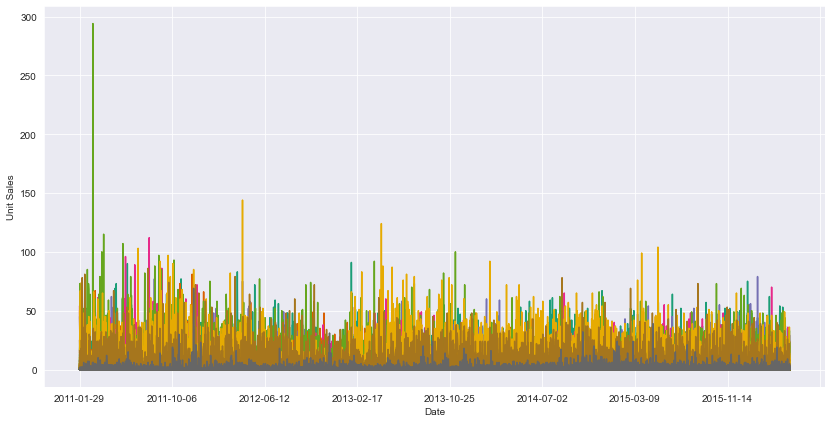

In [35]:
# plot the first 500 sales and visualise the patterns
plt_500 = first_500_sales.plot(colormap = "Dark2", figsize = (14,7),legend=False)
plt_500.set_xlabel("Date")
plt_500.set_ylabel("Unit Sales")

plt.show()

There are no obvious seasonal patterns to be found in this plot. There is a significant dip towards the end of 2012 and start of 2013, which might be worth looking into.

In [36]:
#checking stationarity
from statsmodels.tsa.vector_ar.vecm import coint_johansen
max(abs(coint_johansen(first_500_sales,-1,1).eig))

/Users/zwt2000/.local/lib/python3.8/site-packages/statsmodels/tsa/vector_ar/vecm.py:648: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  warnings.warn(


0.946625634740848

For a series to be stationary, the eigenvalues of |Φ(L)-1| should be less than 1 in modulus. This multivariate time series fulfils the condition.

In [37]:
#creating the train and validation set
train_var = first_500_sales[:int(0.8*(len(first_500_sales)))]
valid_var = first_500_sales[int(0.8*(len(first_500_sales))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train_var)
model_fit = model.fit()

# make prediction on validation
prediction_var = model_fit.forecast(model.endog, steps=len(valid_var))

/Users/zwt2000/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [38]:
#converting predictions to dataframe
pred_var = pd.DataFrame(index=range(0,len(prediction_var)),columns=[first_500_sales.columns])
for j in range(0,500):
    for i in range(0, len(prediction_var)):
       pred_var.iloc[i][j] = prediction_var[i][j]

pred_var = pred_var.astype(int)
pred_var

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,1,1,0,-1,0,0,1,13,0,2,0,0,0,2,0,2,2,0,-2,0,1,0,0,0,0,0,0,0,2,-10,0,1,0,0,1,-1,0,1,0,0,0,1,0,0,1,0,3,6,0,1,...,0,-1,0,0,0,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,1,0,3,0,4,0,1,0,0,1,0,3,5,2,0,11,0,1,0,0,0,0,0,0,0,2,1,0,16,0,0,0,2,1,0,0,0,0,0,1,0,0,1,0,21,0,0,...,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,2,1,3,0,9,0,0,0,0,0,2,4,7,0,0,15,0,0,0,1,0,0,0,0,0,2,4,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,11,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,2,1,0,0,9,0,0,0,0,0,2,4,4,1,0,7,0,0,0,1,0,0,0,0,0,1,2,0,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,11,0,0,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,2,1,0,0,5,0,0,0,0,0,1,0,7,1,0,8,0,0,0,0,0,0,0,0,0,2,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0,0,0,1,0,0,0,6,1,0,0,0,0,1,6,5,1,0,4,0,0,0,1,0,0,0,0,0,1,2,0,5,0,0,0,0,0,0,0,0,0,0,3,1,0,0,1,6,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
380,0,0,0,1,0,0,0,6,1,0,0,0,0,1,6,5,1,0,4,0,0,0,1,0,0,0,0,0,1,2,0,5,0,0,0,0,0,0,0,0,0,0,3,1,0,0,1,6,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
381,0,0,0,1,0,0,0,6,1,0,0,0,0,1,6,5,1,0,4,0,0,0,1,0,0,0,0,0,1,2,0,5,0,0,0,0,0,0,0,0,0,0,3,1,0,0,1,6,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
382,0,0,0,1,0,0,0,6,1,0,0,0,0,1,6,5,1,0,4,0,0,0,1,0,0,0,0,0,1,2,0,5,0,0,0,0,0,0,0,0,0,0,3,1,0,0,1,6,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
# calculate the mean rmse for the VAR model
from numpy import sqrt
from sklearn.metrics import mean_squared_error
np.mean(sqrt(mean_squared_error(pred_var, valid_var)))

2.5663832365152843

The rmse is still relatively low, but it is in fact a little higher than the naive method. 

**Machine Learning Models**

Moving on from statistical methods, we now can incorporate certain features from the other two data sets to build up machine learning models to forecast the unit of sales.

In particular, the store_id and region_id variables seem particularly relevant. So, let us incorporate these two features first. To do that, we use on-hot encoding to convert the two categorical variables into numeric features.

In [40]:
# select features and target variable for the machine learning models
x_ml = pd.get_dummies(train.iloc[: , :6].drop(["id","item_id","subcat_id","store_id"],axis=1))
y_ml = training["forecast"]

In [41]:
x_ml

,category_id_Beauty,category_id_Cleaning,category_id_Food,region_id_Central,region_id_East,region_id_West
0,1,0,0,0,1,0
1,1,0,0,0,1,0
2,1,0,0,0,1,0
3,1,0,0,0,1,0
4,1,0,0,0,1,0
...,...,...,...,...,...,...
30485,0,0,1,0,0,1
30486,0,0,1,0,0,1
30487,0,0,1,0,0,1
30488,0,0,1,0,0,1


In [42]:
y_ml

0        0.0
1        0.0
2        0.0
3        2.0
4        1.0
        ... 
30485    1.0
30486    0.0
30487    1.0
30488    0.0
30489    0.0
Name: forecast, Length: 30490, dtype: float64

Now, we are going to first build three simple machine learning models, predicting the average sales for each of the stores given in the training data set. We are only using the category and region variables for these models. In particular, we are going to look at random forest, XGBoost and SVM. All three are strong machine models that tend to perform well in general.

In [43]:
# create the train and test sets for the machine learning models
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
   x_ml, y_ml, test_size=0.2, random_state=42)

In [44]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=0)
rfmodel = rf.fit(x_train,y_train)

In [45]:
rf_pred = rfmodel.predict(x_test)
rf_pred

array([1.66003639, 0.62962541, 1.66003639, ..., 0.45768252, 1.48027683,
       1.51668188])

In [46]:
# rmse for RandomForest
from sklearn.metrics import mean_squared_error
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_rmse

2.7057060648548754

In [47]:
# XGBoost
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [48]:
xg_reg.fit(x_train,y_train)

xg_pred = xg_reg.predict(x_test)

xg_pred

[21:09:46] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


array([1.0194631 , 0.72150034, 1.0194631 , ..., 0.668593  , 0.9769821 ,
       1.0008111 ], dtype=float32)

In [49]:
# rmse for XGBoost
xg_rmse = np.sqrt(mean_squared_error(y_test, xg_pred))
xg_rmse

2.7346291011752952

In [50]:
# SVM
from sklearn import svm
svm_regr = svm.SVR()

In [51]:
svm_regr.fit(x_train, y_train)

svm_pred = svm_regr.predict(x_test)

svm_pred

array([0.90034966, 0.10002715, 0.90034966, ..., 0.100099  , 0.90023246,
       0.89981546])

In [52]:
# rmse for SVM
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_pred))
svm_rmse

2.7601294488902446

In [53]:
# another error for checking
import numpy as np

def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

print(smape(y_test,rf_pred))
print(smape(y_test,xg_pred))
print(smape(y_test,svm_pred))

141.7525369123461
135.6136509325218
154.87500661549072


All three models have higher rmse than the baseline predictions. This suggests that the categorical variables do not have great predictive power in predicting the unit sales for each store.

**Evaluation of model and selection of best**

After going through the modelling process, we are now ready to evaluate the various models that have built up and select the best amongst these models based on the rmse calculated.

1. The naive methods work best in predicting sales. 

2. Statistical methods using autoregression perform decently well.

3. Machine learning methods perform below expectations. 

**Recommendations**

From all these, we can start to provide some recommendations for stores so that the unit sales for each product can be maximised.

1. Using previous sales as a guide to prepare the number of products could be a good strategy.
2. Seasonal patterns are not a great predictor for sales in this particular case.
3. Rather than looking at the average error/RMSEs across all the stores, one can perhaps investigate more closely the model's performance on individual stores/products. This could potentially provide answers on which models to use in specific cases. 